In [9]:
import glob
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
print(tf.__version__)
keras = tf.keras
import matplotlib.pyplot as plt

import keras2onnx
import onnx
from PIL import Image
import onnxruntime as rt

2.3.0


In [46]:
def img_to_arr(image, name = 'img_CV2_90'):
    nai = np.array(image)
    # nai = cv2.transpose(nai)
    plt.imshow(nai)
    plt.show()
    
    grey = cv2.cvtColor(nai, cv2.COLOR_RGB2GRAY)
#     _, grey = cv2.threshold(grey, 160, 255, cv2.THRESH_BINARY)
#     _, grey = cv2.threshold(grey, 140, 255, cv2.THRESH_BINARY)
    _, grey = cv2.threshold(grey, 130, 255, cv2.THRESH_BINARY)
#     _, grey = cv2.threshold(grey, 120, 255, cv2.THRESH_BINARY)
#     _, grey = cv2.threshold(grey, 90, 255, cv2.THRESH_BINARY)
    
    plt.imshow(grey)
    plt.show()
    
    cnts, _ = cv2.findContours(grey, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)    
    
    mask = np.ones(grey.shape)
    mask = cv2.drawContours(mask, cnts, -1, 0, cv2.FILLED)

    output = nai.copy()
    output[mask.astype(np.bool), :] = 0
    
    image_center = tuple(np.array(output.shape[1::-1]) // 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, -10, 1.0)
    output = cv2.warpAffine(output, rot_mat, output.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    height, width, colors = output.shape
    min_dim = min(width, height)//1

    crp_height = (height - min_dim)//2
    crp_width = (width - min_dim)//2

    top = crp_height
    bot = height - crp_height
    left = crp_width
    right = width - crp_width
    
    output = output[top:bot, left:right, ...]
    
#     output = cv2.resize(output, (128, 128))
#     output = cv2.resize(output, (256, 256))
#     output = cv2.resize(output, (512, 512))
    output = cv2.flip(cv2.transpose(output),1)
#     output = np.flip(np.transpose(output, (1,0,2)) ,-1)
    
    plt.imshow(output)
    plt.show()
    
    cv2.imwrite(f'images/{name}.jpeg',
                cv2.cvtColor(output, cv2.COLOR_RGB2BGR),
                [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    
    return output

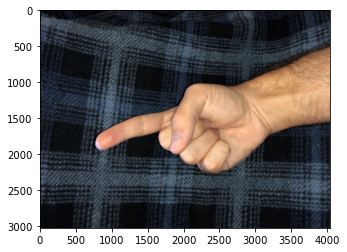

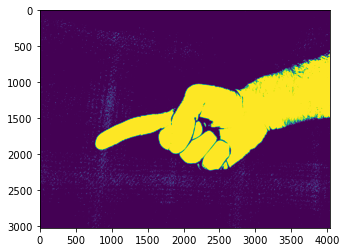

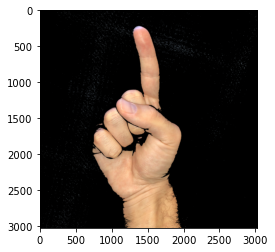

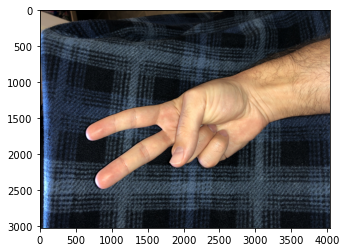

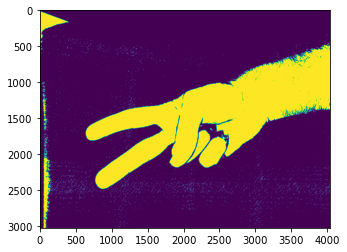

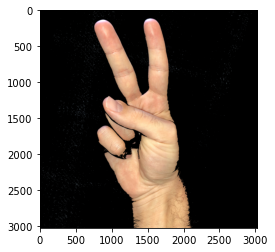

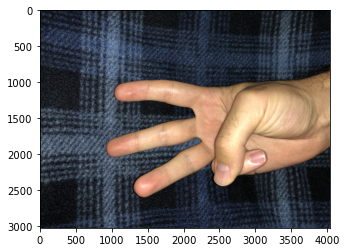

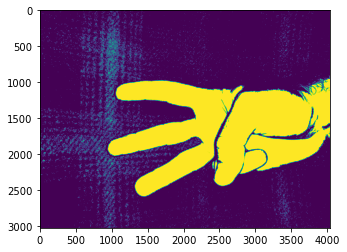

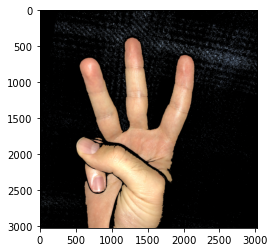

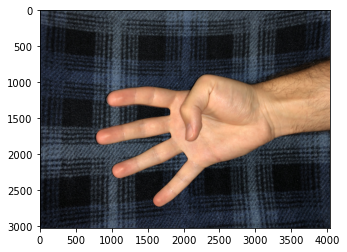

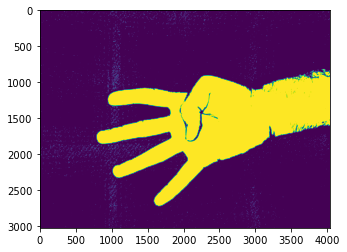

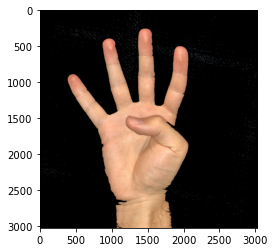

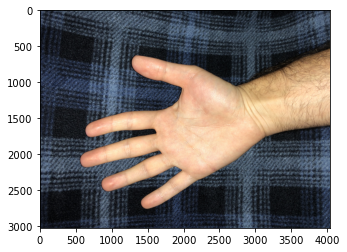

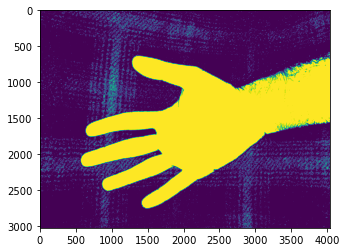

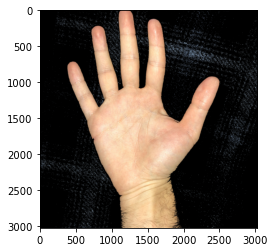

In [47]:
# image = Image.open('./my_hands/IMG_0784.jpeg')
# image = Image.open('./my_hands/IMG_0783.jpeg')
# image = Image.open('./my_hands/IMG_0782.jpeg')
# image = Image.open('./my_hands/IMG_0781.jpeg')
# image = Image.open('./my_hands/IMG_0779.jpeg')

# image = Image.open('./my_hands/IMG_0774.jpeg')
# image = Image.open('./my_hands/IMG_0775.jpeg')
# image = Image.open('./my_hands/IMG_0776.jpeg')
# image = Image.open('./my_hands/IMG_0777.jpeg')
# image = Image.open('./my_hands/IMG_0778.jpeg')

image = Image.open('./my_hands/IMG_0807.jpeg')
output = img_to_arr(image, name='img_1')
image = Image.open('./my_hands/IMG_0808.jpeg')
output = img_to_arr(image, name='img_2')
# image = Image.open('./my_hands/IMG_0811.jpeg')
# image = Image.open('./my_hands/IMG_0817.jpeg')
image = Image.open('./my_hands/IMG_0818.jpeg')
output = img_to_arr(image, name='img_3')
# image = Image.open('./my_hands/IMG_0812.jpeg')
image = Image.open('./my_hands/IMG_0815.jpeg')
output = img_to_arr(image, name='img_4')
image = Image.open('./my_hands/IMG_0813.jpeg')
output = img_to_arr(image, name='img_5')

In [48]:
# image

(1, 128, 128, 1)
[[0.   0.  ]
 [1.   0.98]
 [2.   0.02]
 [3.   0.  ]
 [4.   0.  ]
 [5.   0.  ]]


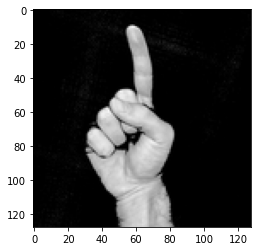

(1, 128, 128, 1)
[[0.   0.  ]
 [1.   0.  ]
 [2.   0.99]
 [3.   0.01]
 [4.   0.  ]
 [5.   0.  ]]


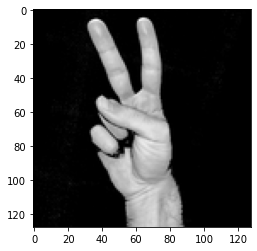

(1, 128, 128, 1)
[[0.   0.  ]
 [1.   0.  ]
 [2.   0.28]
 [3.   0.67]
 [4.   0.04]
 [5.   0.  ]]


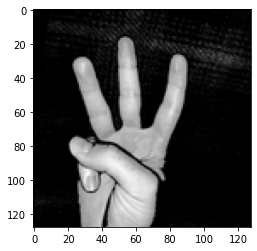

(1, 128, 128, 1)
[[0.   0.  ]
 [1.   0.  ]
 [2.   0.  ]
 [3.   0.01]
 [4.   0.99]
 [5.   0.  ]]


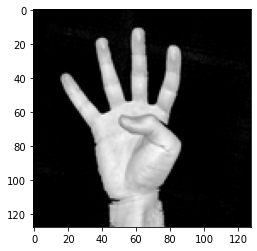

(1, 128, 128, 1)
[[0. 0.]
 [1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [5. 1.]]


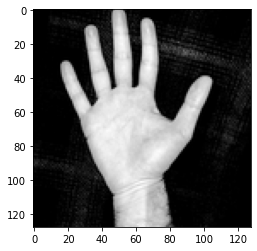

In [49]:
import keras2onnx
import onnx
from PIL import Image
import onnxruntime as rt

sess = rt.InferenceSession('finger_count_4.onnx')

for img_name in ['img_1', 'img_2', 'img_3', 'img_4', 'img_5']:
    image = Image.open(f'images/{img_name}.jpeg').convert('L')
    
#     image = image.rotate(-10)

    height, width = image.size
    min_dim = min(width, height)//1.0

    crp_height = (height - min_dim)//2
    crp_width = (width - min_dim)//2

    top = crp_height
    bot = height - crp_height
    left = crp_width
    right = width - crp_width

    image = image.crop((top, left, bot, right))


    # image = image.crop((image.size[0]-3224,0,image.size[0]-200,image.size[1]))
    image = image.resize((int(128), int(128)), Image.ANTIALIAS)
    x = np.array(image).astype('float32')
#     x = np.flip(np.transpose(x, [1, 0]),-1)
    plt.imshow(x, cmap='gray')
    x = np.expand_dims(np.expand_dims(x, axis=0),axis=-1)


    print(x.shape)

    # Stylize image.
    sess = rt.InferenceSession('finger_count_4.onnx')
    input_name = sess.get_inputs()[0].name
    pred_onx = sess.run(None, {input_name: x})[0]
    
    print(np.concatenate([np.arange(pred_onx.shape[1]).reshape(-1,1),pred_onx.T],-1).round(2))
    plt.show()

In [45]:

# cv2.imwrite("images/input.png", cv2.cvtColor(nai, cv2.COLOR_RGB2BGR))
# cv2.imwrite("images/mask.png", cv2.cvtColor(np.uint8(255 * mask), cv2.COLOR_RGB2BGR))
# cv2.imwrite("images/output.png", cv2.cvtColor(output, cv2.COLOR_RGB2BGR))

# cv2.imwrite('images/img_CV2_90.jpeg', cv2.cvtColor(output, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_JPEG_QUALITY), 90])